In [2]:
!which python

/home/user/jfayzullaev/stellar-clustering/.venv-vis/bin/python


In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
LBL_NORM = "~/stellar-clustering/network/labled-data/labels/label-normalization/labels_entities_normalized.csv"

## Transaction

silhouette, Davies–Bouldin, and Calinski–Harabasz

In [5]:
FN = "transactions/transactions_role2vec_kmeans_results.csv" 
df = pd.read_csv(FN)

In [6]:
X = df[[c for c in df.columns if c.startswith("role")]].values

In [ ]:
k_cols = [c for c in df.columns if c.startswith("kmeans_")]
rows = []
for col in k_cols:
    y = df[col].values
    k = int(col.split("_")[1])
    print(f"Scoring k={k} ...")
    sil = silhouette_score(X, y, metric="euclidean")
    db  = davies_bouldin_score(X, y)
    ch  = calinski_harabasz_score(X, y)
    rows.append({"k": k, "silhouette": sil, "davies_bouldin": db, "calinski_harabasz": ch})

out = pd.DataFrame(rows).sort_values("k")
out.to_csv("transactions/transaction_kmeans_intrinsic_scores.csv", index=False)
print(out)
print("\nSaved")

Scoring k=10 ...
Scoring k=15 ...
Scoring k=20 ...
Scoring k=30 ...
Scoring k=40 ...
Scoring k=50 ...
Scoring k=65 ...
Scoring k=70 ...
Scoring k=75 ...
Scoring k=80 ...
Scoring k=100 ...
Scoring k=120 ...
Scoring k=150 ...
Scoring k=180 ...
Scoring k=210 ...
Scoring k=250 ...
Scoring k=300 ...
Scoring k=350 ...
Scoring k=400 ...
      k  silhouette  davies_bouldin  calinski_harabasz
0    10    0.025592        3.223773        4350.422767
1    15    0.017895        3.057962        3619.050715
2    20   -0.003339        3.079995        3055.647846
3    30   -0.007066        3.162260        2377.738790
4    40   -0.019105        3.069753        1983.788428
5    50   -0.038868        3.010453        1720.572417
6    65   -0.062399        2.988685        1448.738781
7    70   -0.060589        3.001172        1371.385691
8    75   -0.051715        2.906261        1310.950470
9    80   -0.063321        2.979240        1260.853871
10  100   -0.070663        2.993509        1072.048841
11  120 

In [3]:
intr = pd.read_csv("transactions/transaction_kmeans_intrinsic_scores.csv").sort_values("k")

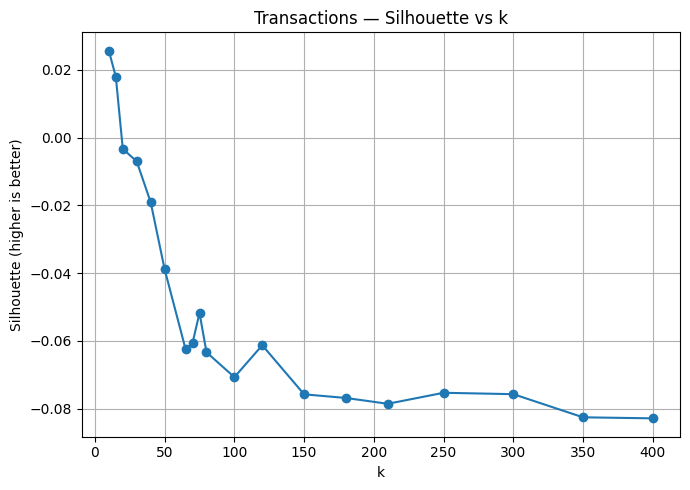

In [7]:
plt.figure(figsize=(7,5))
plt.plot(intr["k"], intr["silhouette"], marker="o")
plt.xlabel("k"); plt.ylabel("Silhouette (higher is better)")
plt.title("Transactions — Silhouette vs k")
plt.grid(True, which="both", axis="both")
plt.tight_layout(); plt.show()

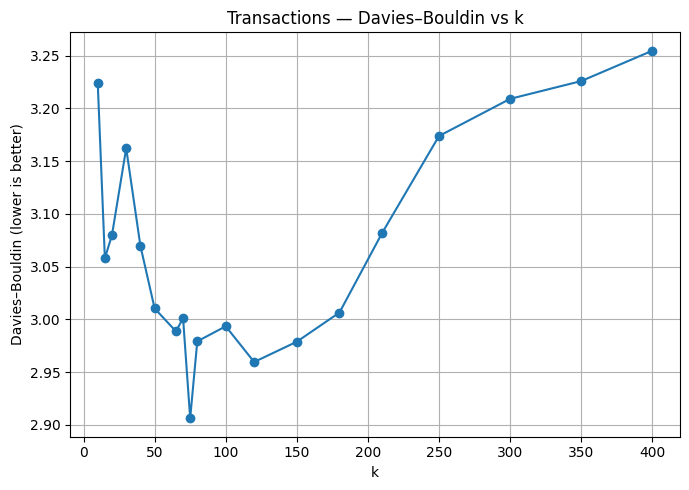

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(intr["k"], intr["davies_bouldin"], marker="o")
plt.xlabel("k"); plt.ylabel("Davies–Bouldin (lower is better)")
plt.title("Transactions — Davies–Bouldin vs k")
plt.grid(True, which="both", axis="both")
plt.tight_layout(); plt.show()

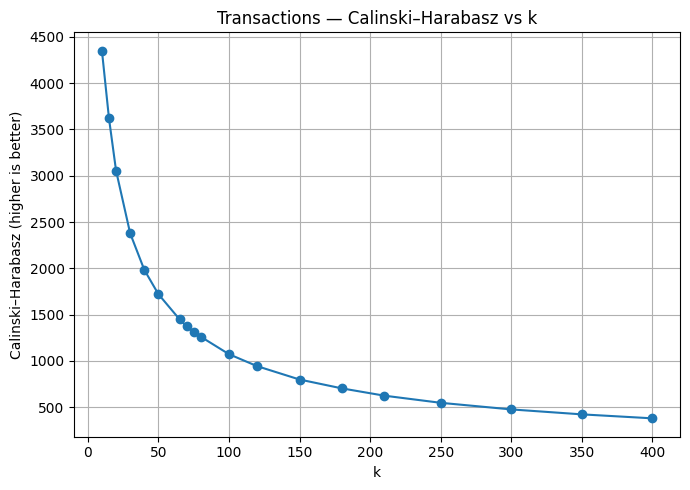

In [9]:
plt.figure(figsize=(7,5))
plt.plot(intr["k"], intr["calinski_harabasz"], marker="o")
plt.xlabel("k"); plt.ylabel("Calinski–Harabasz (higher is better)")
plt.title("Transactions — Calinski–Harabasz vs k")
plt.grid(True, which="both", axis="both")
plt.tight_layout(); plt.show()

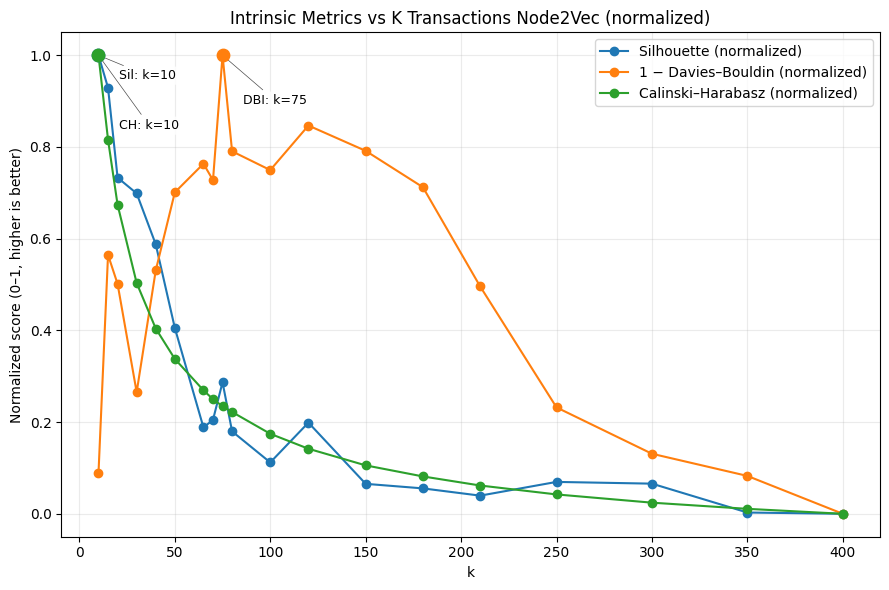

In [7]:
plt.figure(figsize=(9,6))
plt.plot(k, sil_n, marker="o", label="Silhouette (normalized)")
plt.plot(k, dbi_n, marker="o", label="1 − Davies–Bouldin (normalized)")
plt.plot(k, ch_n,  marker="o", label="Calinski–Harabasz (normalized)")


ann_cfg = [
    (best_sil_idx, "Sil: k={}".format(int(k[best_sil_idx])), sil_n),
    (best_dbi_idx, "DBI: k={}".format(int(k[best_dbi_idx])), dbi_n),
    (best_ch_idx,  "CH: k={}".format(int(k[best_ch_idx])),  ch_n),
]


offsets = [(15, -10), (15, -28), (15, -46)]  

for (idx, label, series), (dx, dy) in zip(ann_cfg, offsets):
    x_val = k[idx]
    y_val = series.iloc[idx]

    plt.scatter([x_val], [y_val], s=80, zorder=5)
    plt.annotate(
        label,
        xy=(x_val, y_val),
        xytext=(dx, dy),         
        textcoords="offset points", 
        ha="left",
        va="top",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.85),
        arrowprops=dict(arrowstyle="-", lw=0.5, alpha=0.7),
    )

plt.xlabel("k")
plt.ylabel("Normalized score (0–1, higher is better)")
plt.title("Intrinsic Metrics vs K Transactions Node2Vec (normalized)")
plt.grid(True, which="both", axis="both", alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
EMB_FN = "transactions/transactions_role2vec_kmeans_results.csv"
# LPA_FN = "../../Community Detection/Label Propagation/Unsupervised/transaction/transactions_lpa_labels.csv"

In [27]:
emb = pd.read_csv(EMB_FN)
# lpa = pd.read_csv(LPA_FN)[["account_id","lpa_label"]]
lblnorm = pd.read_csv(LBL_NORM)[["account_id","name"]]

In [28]:
# align dtypes
for col in ["account_id"]:
    try:
        emb[col] = emb[col].astype("Int64")
        lblnorm[col] = lblnorm[col].astype("Int64")
    except Exception:
        emb[col] = emb[col].astype(str)
        lblnorm[col] = lblnorm[col].astype(str)

# inner join
df = emb.merge(lblnorm, on="account_id", how="inner")
print(f"Matched accounts for extrinsic eval: {len(df):,} / {len(emb):,}")


Matched accounts for extrinsic eval: 397 / 206,451


In [29]:
df_eval = df

In [30]:
k_cols = sorted([c for c in df_eval.columns if c.startswith("kmeans_")],
                key=lambda s: int(s.split("_")[1]))


In [31]:
def purity(y_true, y_pred):
    if len(y_true) == 0:
        return float("nan")
    total = len(y_true)
    score = 0
    for c in set(y_pred):
        idx = (y_pred == c)
        if idx.any():
            score += Counter(y_true[idx]).most_common(1)[0][1]
    return score / total

In [32]:
for col in ["account_id"]:
    try:
        emb[col] = emb[col].astype("Int64")
        lblnorm[col] = lblnorm[col].astype("Int64")
    except Exception:
        emb[col] = emb[col].astype(str)
        lblnorm[col] = lblnorm[col].astype(str)

In [33]:
df = emb.merge(lblnorm, on="account_id", how="inner")
k_cols = [c for c in emb.columns if c.startswith("kmeans_")]

In [34]:
rows = []

y_ref = df["name"].to_numpy()
for kcol in k_cols:
    y = df[kcol].to_numpy()
    k = int(kcol.split("_")[1])
    rows.append({
        "k": k,
        "NMI_vs_LPA": normalized_mutual_info_score(y_ref, y),
        "ARI_vs_LPA": adjusted_rand_score(y_ref, y),
        "Purity_vs_LPA": purity(y_ref, y),
    })

ext = pd.DataFrame(rows).sort_values("k").reset_index(drop=True)
display(ext)

,k,NMI_vs_LPA,ARI_vs_LPA,Purity_vs_LPA
0,10,0.301247,0.069352,0.740554
1,15,0.299390,0.063254,0.745592
2,20,0.285993,0.003341,0.745592
3,30,0.311541,0.035592,0.755668
4,40,0.341707,0.048079,0.758186
5,50,0.358038,0.058424,0.775819
6,65,0.360129,0.045282,0.785894
7,70,0.367438,0.049132,0.785894
8,75,0.361575,0.043979,0.783375
9,80,0.358558,0.048178,0.783375


all optimal at k=20

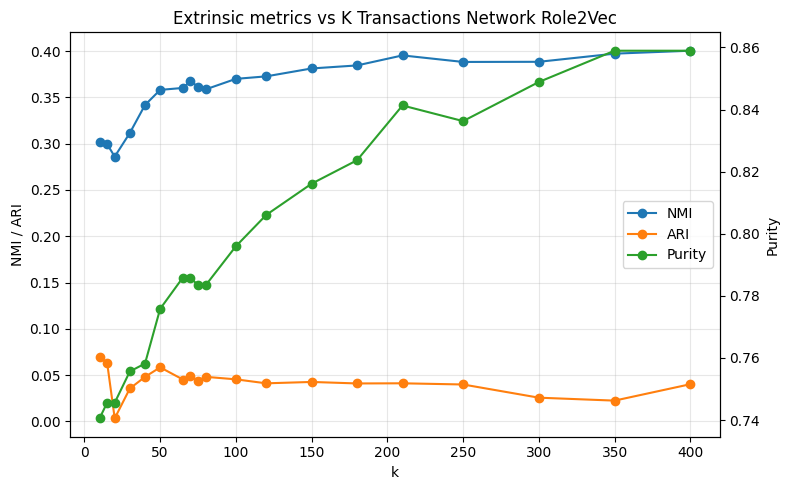

In [35]:
k   = ext["k"].astype(int)
nmi = ext["NMI_vs_LPA"]
ari = ext["ARI_vs_LPA"]
pur = ext["Purity_vs_LPA"]

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

l1, = ax1.plot(k, nmi, marker="o", label="NMI", color="tab:blue")
l2, = ax1.plot(k, ari, marker="o", label="ARI", color="tab:orange")
l3, = ax2.plot(k, pur, marker="o", label="Purity", color="tab:green")

ax1.set_xlabel("k")
ax1.set_ylabel("NMI / ARI")
ax2.set_ylabel("Purity")

ax1.grid(True, alpha=0.3)
ax1.legend([l1, l2, l3], ["NMI", "ARI", "Purity"], loc="best")
plt.title("Extrinsic metrics vs K Transactions Network Role2Vec")
plt.tight_layout()
plt.show()

## Trustline

silhouette, Davies–Bouldin, and Calinski–Harabasz

In [17]:
FN = "trustlines/trustlines_role2vec_kmeans_results.csv"
df = pd.read_csv(FN)

In [18]:
X = df[[c for c in df.columns if c.startswith("role")]].values

In [ ]:
k_cols = [c for c in df.columns if c.startswith("kmeans_")]
rows = []
for col in k_cols:
    y = df[col].values
    k = int(col.split("_")[1])
    print(f"Scoring k={k} ...")
    sil = silhouette_score(X, y, metric="euclidean")
    db  = davies_bouldin_score(X, y)
    ch  = calinski_harabasz_score(X, y)
    rows.append({"k": k, "silhouette": sil, "davies_bouldin": db, "calinski_harabasz": ch})

out = pd.DataFrame(rows).sort_values("k")
out.to_csv("trustlines/trustline_kmeans_intrinsic_scores.csv", index=False)
print(out)
print("\nSaved to kmeans_intrinsic_scores.csv")

Scoring k=10 ...
Scoring k=15 ...
Scoring k=20 ...
Scoring k=30 ...
Scoring k=40 ...
Scoring k=50 ...
Scoring k=65 ...
Scoring k=70 ...
Scoring k=75 ...
Scoring k=80 ...
Scoring k=100 ...
Scoring k=120 ...
Scoring k=150 ...
Scoring k=180 ...
Scoring k=210 ...
Scoring k=250 ...
Scoring k=300 ...
Scoring k=350 ...
Scoring k=400 ...
      k  silhouette  davies_bouldin  calinski_harabasz
0    10    0.104683        2.576032         997.594157
1    15    0.084913        2.798866         804.620509
2    20    0.087681        2.622685         689.808277
3    30    0.076976        2.686356         532.920797
4    40    0.069982        2.802176         438.855946
5    50    0.071270        2.636932         378.500805
6    65    0.071937        2.676101         315.417510
7    70    0.070359        2.683058         300.569684
8    75    0.068120        2.731967         284.991217
9    80    0.071232        2.699305         271.666088
10  100    0.066943        2.772796         231.530860
11  120 

intrinsic metrics favor a coarser partition around k ≈ 20

In [8]:
intr = pd.read_csv("trustlines/trustline_kmeans_intrinsic_scores.csv").sort_values("k")

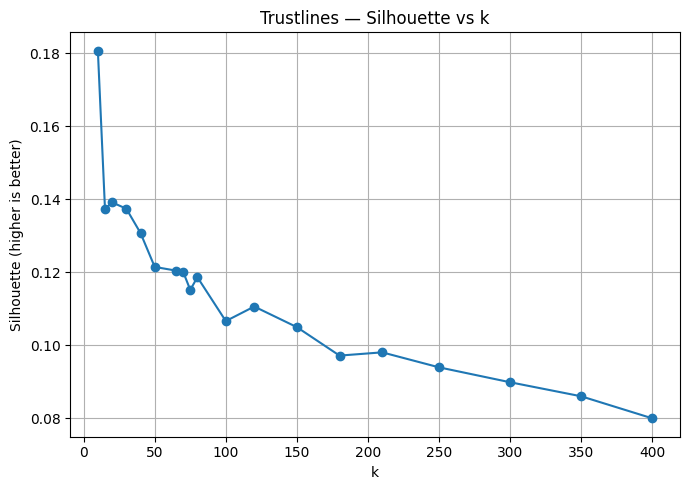

In [59]:
plt.figure(figsize=(7,5))
plt.plot(intr["k"], intr["silhouette"], marker="o")
plt.xlabel("k"); plt.ylabel("Silhouette (higher is better)")
plt.title("Trustlines — Silhouette vs k")
plt.grid(True, which="both", axis="both")
plt.tight_layout(); plt.show()

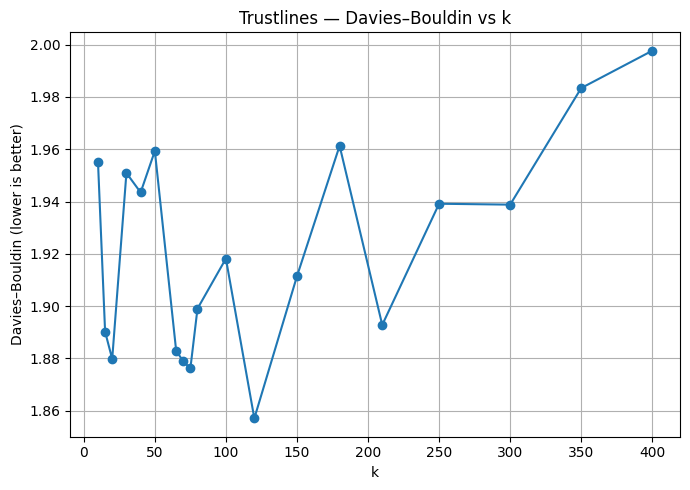

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(intr["k"], intr["davies_bouldin"], marker="o")
plt.xlabel("k"); plt.ylabel("Davies–Bouldin (lower is better)")
plt.title("Trustlines — Davies–Bouldin vs k")
plt.grid(True, which="both", axis="both")
plt.tight_layout(); plt.show()

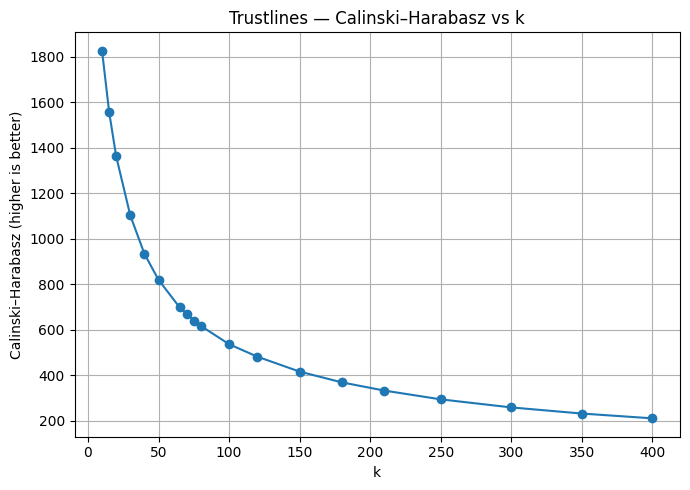

In [61]:
plt.figure(figsize=(7,5))
plt.plot(intr["k"], intr["calinski_harabasz"], marker="o")
plt.xlabel("k"); plt.ylabel("Calinski–Harabasz (higher is better)")
plt.title("Trustlines — Calinski–Harabasz vs k")
plt.grid(True, which="both", axis="both")
plt.tight_layout(); plt.show()

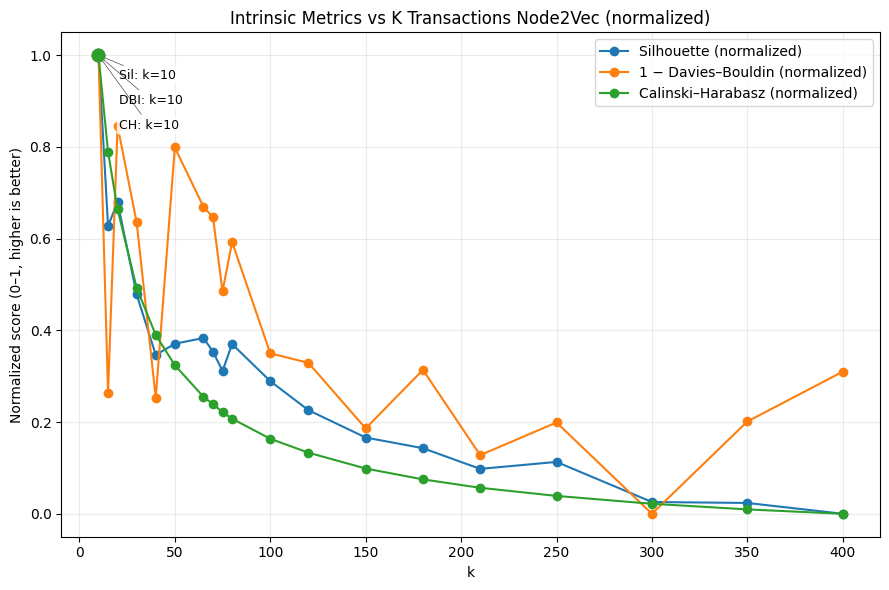

In [10]:
plt.figure(figsize=(9,6))
plt.plot(k, sil_n, marker="o", label="Silhouette (normalized)")
plt.plot(k, dbi_n, marker="o", label="1 − Davies–Bouldin (normalized)")
plt.plot(k, ch_n,  marker="o", label="Calinski–Harabasz (normalized)")


ann_cfg = [
    (best_sil_idx, "Sil: k={}".format(int(k[best_sil_idx])), sil_n),
    (best_dbi_idx, "DBI: k={}".format(int(k[best_dbi_idx])), dbi_n),
    (best_ch_idx,  "CH: k={}".format(int(k[best_ch_idx])),  ch_n),
]


offsets = [(15, -10), (15, -28), (15, -46)]  

for (idx, label, series), (dx, dy) in zip(ann_cfg, offsets):
    x_val = k[idx]
    y_val = series.iloc[idx]

    plt.scatter([x_val], [y_val], s=80, zorder=5)
    plt.annotate(
        label,
        xy=(x_val, y_val),
        xytext=(dx, dy),         
        textcoords="offset points", 
        ha="left",
        va="top",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.85),
        arrowprops=dict(arrowstyle="-", lw=0.5, alpha=0.7),
    )

plt.xlabel("k")
plt.ylabel("Normalized score (0–1, higher is better)")
plt.title("Intrinsic Metrics vs K Transactions Node2Vec (normalized)")
plt.grid(True, which="both", axis="both", alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

Extrinsic vs. LPA

In [36]:
EMB_FN = "trustlines/trustlines_role2vec_kmeans_results.csv"
# LPA_FN = "../Community Detection/Label Propagation/trustline/trustlines_lpa_labels.csv"

In [37]:
def purity(y_true, y_pred):
    total = len(y_true)
    score = 0
    for c in set(y_pred):
        idx = (y_pred == c)
        mc = Counter(y_true[idx]).most_common(1)
        score += mc[0][1] if mc else 0
    return score / total

In [38]:
emb = pd.read_csv(EMB_FN)
# lblnorm = pd.read_csv(LBL_NORM)[["account_id","lpa_label"]]
lblnorm = pd.read_csv(LBL_NORM)[["account_id","name"]]

In [39]:
for col in ["account_id"]:
    try:
        emb[col] = emb[col].astype("Int64")
        lblnorm[col] = lblnorm[col].astype("Int64")
    except Exception:
        emb[col] = emb[col].astype(str)
        lblnorm[col] = lblnorm[col].astype(str)

df = emb.merge(lblnorm, on="account_id", how="inner")
print(f"Matched accounts for extrinsic eval: {len(df):,} / {len(emb):,}")

Matched accounts for extrinsic eval: 139 / 24,586


In [40]:
df_eval = df

In [41]:
k_cols = sorted([c for c in df_eval.columns if c.startswith("kmeans_")],
                key=lambda s: int(s.split("_")[1]))

In [42]:
def purity(y_true, y_pred):
    if len(y_true) == 0:
        return float("nan")
    total = len(y_true)
    score = 0
    for c in set(y_pred):
        idx = (y_pred == c)
        if idx.any():
            score += Counter(y_true[idx]).most_common(1)[0][1]
    return score / total
for col in ["account_id"]:
    try:
        emb[col] = emb[col].astype("Int64")
        lblnorm[col] = lblnorm[col].astype("Int64")
    except Exception:
        emb[col] = emb[col].astype(str)
        lblnorm[col] = lblnorm[col].astype(str)
df = emb.merge(lblnorm, on="account_id", how="inner")
k_cols = [c for c in emb.columns if c.startswith("kmeans_")]

In [43]:
rows = []
y_ref = df["name"].to_numpy()
for kcol in k_cols:
    y = df[kcol].to_numpy()
    k = int(kcol.split("_")[1])
    rows.append({
        "k": k,
        "NMI_vs_LPA": normalized_mutual_info_score(y_ref, y),
        "ARI_vs_LPA": adjusted_rand_score(y_ref, y),
        "Purity_vs_LPA": purity(y_ref, y),
    })

ext = pd.DataFrame(rows).sort_values("k").reset_index(drop=True)
display(ext)

,k,NMI_vs_LPA,ARI_vs_LPA,Purity_vs_LPA
0,10,0.198359,0.027758,0.870504
1,15,0.233540,0.029337,0.877698
2,20,0.247550,0.038431,0.870504
3,30,0.251480,0.020244,0.892086
4,40,0.255857,0.016078,0.892086
5,50,0.281976,0.017273,0.920863
6,65,0.266278,0.013280,0.913669
7,70,0.280167,0.015275,0.928058
8,75,0.270358,0.014574,0.913669
9,80,0.270701,0.012322,0.928058


ARI is highest at k=20, while NMI is marginally higher at k≈70

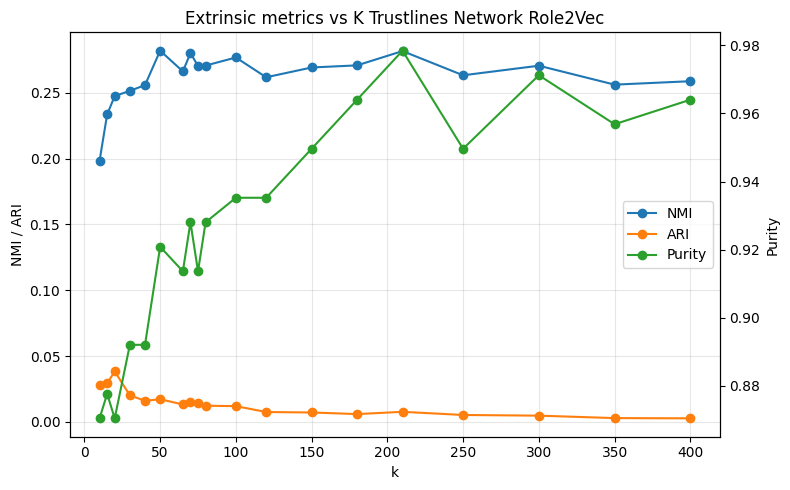

In [44]:
k   = ext["k"].astype(int)
nmi = ext["NMI_vs_LPA"]
ari = ext["ARI_vs_LPA"]
pur = ext["Purity_vs_LPA"]

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

l1, = ax1.plot(k, nmi, marker="o", label="NMI", color="tab:blue")
l2, = ax1.plot(k, ari, marker="o", label="ARI", color="tab:orange")
l3, = ax2.plot(k, pur, marker="o", label="Purity", color="tab:green")

ax1.set_xlabel("k")
ax1.set_ylabel("NMI / ARI")
ax2.set_ylabel("Purity")

ax1.grid(True, alpha=0.3)
ax1.legend([l1, l2, l3], ["NMI", "ARI", "Purity"], loc="best")
plt.title("Extrinsic metrics vs K Trustlines Network Role2Vec")
plt.tight_layout()
plt.show()